In [178]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import skimage

%matplotlib inline

In [179]:
print("Hello world")

Hello world


In [180]:
train_set_x_orig, train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

In [1]:
index = 27
example = train_set_x_orig[index]
plt.imshow(example)
print ("y = " + str(train_set_y[:, index]) + ", it's a '" +
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

NameError: name 'train_set_x_orig' is not defined

In [182]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [115]:
X = train_set_x_orig
X_test = test_set_x_orig
train_set_x_flatten = X.reshape(X.shape[0],-1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [116]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [117]:
len(train_set_x)

12288

In [118]:
print(train_set_x.shape)

(12288, 209)


In [119]:
def sigmoid(z):
    s = np.exp(-z)
    basic_sigmoid = 1/(1+s)
    
    return basic_sigmoid

In [120]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [121]:
def initialize_with_zeros(dim):
    w = np.zeros([dim,1])
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [122]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [123]:
def propagate(w,b,X,Y):
    m = (Y.shape[1])
    
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    
    summation = (Y * np.log(A)) + ((1 - Y) * np.log(1 - A))
    cost = (-1/m) *np.sum(summation)
   
    dz = A - Y
    dw = (1/m) *  (X @ dz.T)
    db = (1/m) * np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost



In [124]:

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [171]:
costs = []
def optimize(w,b,X,Y,num_iterations, learning_rate,print_cost = False):
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
                   
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
                   
    

In [162]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [163]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    
    [print(x) for x in A]
    Y_prediction = np.array(A > 0.5,dtype = int)
            
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction


In [164]:
print ("predictions = " + str(predict(w, b, X)))

[0.99987661 0.99999386]
predictions = [[1 1]]


In [165]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations,learning_rate,print_cost)
    
    w = params["w"]
    b = params["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    
     # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [166]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
[0.94366988 0.86095311 0.88896715 0.93630641 0.74075403 0.52849619
 0.03094677 0.85707681 0.88457925 0.67279696 0.26601085 0.4823794
 0.74741157 0.78575729 0.00978911 0.9203284  0.02453695 0.84884703
 0.2050248  0.03703224 0.92931392 0.11930532 0.01411064 0.7832698
 0.58188015 0.66897565 0.7

(12288, 50)
y = 1, you predicted that it is a "cat" picture.


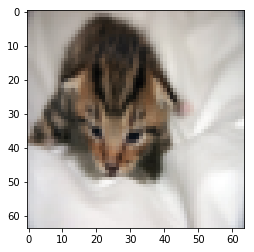

In [193]:
index =  1
made = test_set_x[:]
print(made.shape)
plt.imshow(test_set_x[:, index].reshape((num_px,num_px,3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

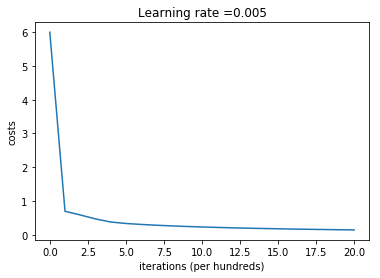

In [168]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("costs")
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
[0.97125943 0.9155338  0.92079132 0.96358044 0.78924234 0.60411297
 0.01179527 0.89814048 0.91522859 0.70264065 0.19380387 0.49537355
 0.7927164  0.85423431 0.00298587 0.96199699 0.01234735 0.9107653
 0.13661137 0.01424336 0.96894735 0.1033746  0.00579297 0.86081326
 0.53811196 0.64950178 0.83272843 0.00426307 0.0131452  0.99947804
 0.11468372 0.82182442 0.69611733 0.4991522  0.67231401 0.01728165
 0.04136099 0.80069693 0.26832359 0.03958566 0.74731239 0.32116434
 0.71871197 0.01205725 0.96879962 0.62310364 0.17737126 0.98960523
 0.74697265 0.07284605]
[1.47839653e-01 5.78008189e-02 9.42385025e-01 4.14849242e-05
 2.27209941e-02 7.29254668e-02 2.23704495e-02 9.49717864e-01
 5.41724297e-02 2.92729896e-02 6.82412299e-02 8.33370210e-01
 1.71420615e-01 9.66879883e-01 8.11537151e-01 2.44343486e-02
 7.87634096e-03 2.64027273e-02 5.60720048e-02 9.53130353e-01
 5.30865327e-03 3.11020747e-02 1.43606493e-01 1.92650472e-02
 9.30132798e-01 8.95291211e-01 2.72790551e-02 9.0148

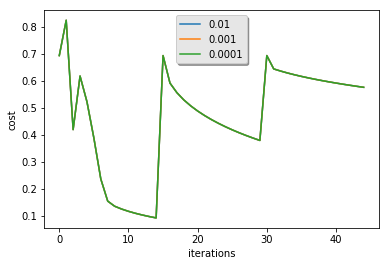

In [172]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

(378, 300, 3)
(12288, 1)
[0.17874056]
y = 0, your algorithm predicts a "non-cat" picture.


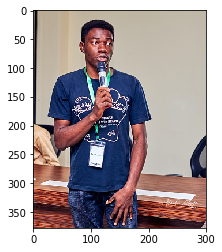

In [205]:
my_image = "new Pic.jpg"
fname = "images/" + my_image
image = np.array(plt.imread(fname))
print(image.shape)
#skimage is used to resize an image or compress an image into an array of choice
my_image = skimage.transform.resize(image, output_shape = (num_px, num_px)).reshape(num_px*num_px*3,1)
print(my_image.shape)
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")